In [1]:
import pandas as pd
import re
import os
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd
import requests
from shapely.geometry import Point, MultiPolygon
from urllib3.util import Retry
from tenacity import retry, stop_after_attempt, wait_exponential
from shapely.ops import nearest_points
from requests.adapters import HTTPAdapter
from concurrent.futures import ThreadPoolExecutor, as_completed
import folium
import math
import pyproj
from itertools import chain
from pandas.plotting import scatter_matrix 
import seaborn as sns
from sklearn.neighbors import BallTree
from sklearn import set_config
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from dbfread import DBF
from sklearn.preprocessing import LabelEncoder
from functools import reduce
from scipy.stats import skew


from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from scipy.stats import skew


from sklearn.feature_selection import RFECV

from sklearn.model_selection import RandomizedSearchCV

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import numpy as np


set_config(display='diagram')

# Features

In [2]:
Features = pd.read_csv('/Users/joseph/SRC/Maters/New/Feb/CSVCreation/Take1/ML Learning Mun Stats/CSV/All.csv')

### LandUse

In [3]:
Class = pd.read_csv('/Users/joseph/SRC/Maters/New/Feb/CSVCreation/Take1/ML Learning Mun Stats/CSV/Parameters/Class.csv')
Class = Class.columns.tolist()[1:]

One = pd.read_csv('/Users/joseph/SRC/Maters/New/Feb/CSVCreation/Take1/ML Learning Mun Stats/CSV/Parameters/One.csv')
One = One.columns.tolist()[1:]

Two = pd.read_csv('/Users/joseph/SRC/Maters/New/Feb/CSVCreation/Take1/ML Learning Mun Stats/CSV/Parameters/Two.csv')
Two = Two.columns.tolist()[1:]

In [4]:
Class

['artificial dams (including canals)',
 'artificial flooded mine pits',
 'artificial sewage ponds',
 'bare riverbed material',
 'coastal sand & dunes',
 'commercial',
 'commercial annual crops non-pivot irrigated',
 'commercial annual crops pivot irrigated',
 'commercial annual crops rain-fed / dryland',
 'contiguous & dense plantation forest',
 'contiguous (indigenous) forest',
 'contiguous low forest & thicket',
 'cultivated commercial permanent orchards',
 'cultivated commercial permanent pineapples',
 'cultivated commercial permanent vines',
 'cultivated commercial sugarcane non-pivot',
 'cultivated commercial sugarcane pivot irrigated',
 'cultivated emerging farmer sugarcane non-pivot',
 'dense forest & woodland',
 'dry pans',
 'eroded lands',
 'fallow land & old fields (bare)',
 'fallow land & old fields (bush)',
 'fallow land & old fields (grass)',
 'fallow land & old fields (low shrub)',
 'fallow land & old fields (trees)',
 'fallow land & old fields (wetlands)',
 'herbaceous w

In [5]:
One

['Barren Land',
 'Built-up',
 'Cultivated',
 'Forested Land',
 'Forested land',
 'Grassland',
 'Mines & Quarries',
 'Shrubland',
 'Waterbodies',
 'Wetlands']

In [6]:
Two

['Artificial Waterbodies',
 'Commercial',
 'Consolidated',
 'Extraction Sites',
 'Fallow Lands & Old Fields',
 'Herbaceous Wetlands',
 'Industrial',
 'Karoo & Fynbos Shubland',
 'Natural Grassland',
 'Natural Waterbodies',
 'Natural Wooded Land',
 'Permanent Crops',
 'Planted Forest',
 'Residential',
 'Shrubs',
 'Smallholdings',
 'Surface Infrastructure',
 'Temporary Crops',
 'Transport',
 'Unconsolidated',
 'Urban Vegetation',
 'Village',
 'Waste & Resource Dumps',
 'Woody Wetlands']

### Crime

In [7]:
Crime = pd.read_csv('/Users/joseph/SRC/Maters/New/Feb/CSVCreation/Take1/ML Learning Mun Stats/CSV/Parameters/Crime.csv')
Crime = Crime['Crime_Category'].unique().tolist()

### Financial Data

In [8]:
FinancialData = ['Fruitless and Wasteful Expenditure', 'Irregular Expenditure', 'Unauthorised Expenditure', 'total waste']

### StreetView

In [9]:
streetViewParams = [
'NuPhotos',
'PotholeRatio',
'PeopleRatio',
'TrashRatio',
'CarRatio',
'BusRatio',
'TruckRatio',
'MotorbikeRatio',
'RoadRatio', 
'PotholeLagDifference',
'PeopleLagDifference',
'TrashLagDifference',
'CarLagDifference',
'BusLagDifference',
'TrucklagDifference',
'MotorbikeLagDifference',
'RoadLagDifffference',
'PeopleCarRatio']

### Combining

In [10]:
# Params = streetViewParams
# Params = streetViewParams + FinancialData + Class + Crime
# Params = streetViewParams + FinancialData + One + Crime
# Params = streetViewParams + FinancialData + Two + Crime


Params = streetViewParams + FinancialData + Crime + Two

Params

['NuPhotos',
 'PotholeRatio',
 'PeopleRatio',
 'TrashRatio',
 'CarRatio',
 'BusRatio',
 'TruckRatio',
 'MotorbikeRatio',
 'RoadRatio',
 'PotholeLagDifference',
 'PeopleLagDifference',
 'TrashLagDifference',
 'CarLagDifference',
 'BusLagDifference',
 'TrucklagDifference',
 'MotorbikeLagDifference',
 'RoadLagDifffference',
 'PeopleCarRatio',
 'Fruitless and Wasteful Expenditure',
 'Irregular Expenditure',
 'Unauthorised Expenditure',
 'total waste',
 'Murder',
 'Attempted murder',
 'Robbery with aggravating circumstances',
 'Common robbery',
 'Rape',
 'Sexual assault',
 'Kidnapping',
 'Assault with the intent to inflict grievous bodily harm',
 'Common assault',
 'Burglary at non-residential premises',
 'Burglary at residential premises',
 'Stock-theft',
 'Shoplifting',
 'Theft of motor vehicle and motorcycle',
 'Theft out of or from motor vehicle',
 'All theft not mentioned elsewhere',
 'Arson',
 'Malicious damage to property',
 'Commercial crime',
 'Drug-related crime',
 'Driving under 

# ML Creation

In [11]:
num_features = 15
target = 'EFF%'
ML = Features.copy()
ML = ML[[target] + Params]


In [12]:
ML.columns

Index(['EFF%', 'NuPhotos', 'PotholeRatio', 'PeopleRatio', 'TrashRatio',
       'CarRatio', 'BusRatio', 'TruckRatio', 'MotorbikeRatio', 'RoadRatio',
       'PotholeLagDifference', 'PeopleLagDifference', 'TrashLagDifference',
       'CarLagDifference', 'BusLagDifference', 'TrucklagDifference',
       'MotorbikeLagDifference', 'RoadLagDifffference', 'PeopleCarRatio',
       'Fruitless and Wasteful Expenditure', 'Irregular Expenditure',
       'Unauthorised Expenditure', 'total waste', 'Murder', 'Attempted murder',
       'Robbery with aggravating circumstances', 'Common robbery', 'Rape',
       'Sexual assault', 'Kidnapping',
       'Assault with the intent to inflict grievous bodily harm',
       'Common assault', 'Burglary at non-residential premises',
       'Burglary at residential premises', 'Stock-theft', 'Shoplifting',
       'Theft of motor vehicle and motorcycle',
       'Theft out of or from motor vehicle',
       'All theft not mentioned elsewhere', 'Arson',
       'Malicious d

In [13]:


# Create new grouped crime columns
ML["Violent Crime"] = (
    ML["Murder"] + ML["Attempted murder"] +
    ML["Robbery with aggravating circumstances"] + ML["Common robbery"] +
    ML["Kidnapping"] + ML["Assault with the intent to inflict grievous bodily harm"] +
    ML["Common assault"] + ML["Carjacking"] + ML["Truck hijacking"]
)

ML["Sexual Crime"] = (
    ML["Rape"] + ML["Sexual assault"] + ML["Attempted sexual offences"] +
    ML["Contact sexual offences"] + ML["Sexual offences detected as a result of police action"] +
    ML["Sexual offences"]
)

ML["Residential Theft"] = (
    ML["Burglary at residential premises"] + ML["Robbery at residential premises"]
)

ML["Auto Theft"] = (
    ML["Theft out of or from motor vehicle"] + ML["Theft of motor vehicle and motorcycle"]
)

ML["Commercial Theft"] = (
    ML["Burglary at non-residential premises"] + ML["Robbery at non-residential premises"] +
    ML["Shoplifting"] + ML["Stock-theft"]
)

ML["Financial Crime"] = ML["Commercial crime"]

ML["Drug & Alcohol Crime"] = (
    ML["Drug-related crime"] + ML["Driving under the influence of alcohol or drugs"]
)

ML["Weapon Crime"] = ML["Illegal possession of firearms and ammunition"]

ML["Organized Crime"] = (
    ML["Robbery of cash in transit"] + ML["Bank robbery"] + ML["TRIO crime"]
)

ML["Police Detected Crime"] = ML["Crime detected as a result of police action"]

ML["General Crime"] = (
    ML["Contact crime (Crimes against the person)"] + ML["Contact-related crime"] +
    ML["Property-related crime"] + ML["Other serious crime"] + ML["17 Community reported serious crime"]
)

# List of original crime-related columns to drop
columns_to_drop = [
    "Murder", "Attempted murder", "Robbery with aggravating circumstances",
    "Common robbery", "Kidnapping", "Assault with the intent to inflict grievous bodily harm",
    "Common assault", "Carjacking", "Truck hijacking", "Rape", "Sexual assault",
    "Attempted sexual offences", "Contact sexual offences",
    "Sexual offences detected as a result of police action", "Sexual offences",
    "Burglary at residential premises", "Robbery at residential premises",
    "Theft out of or from motor vehicle", "Theft of motor vehicle and motorcycle",
    "Burglary at non-residential premises", "Robbery at non-residential premises",
    "Shoplifting", "Stock-theft", "Commercial crime", "Drug-related crime",
    "Driving under the influence of alcohol or drugs", "Illegal possession of firearms and ammunition",
    "Robbery of cash in transit", "Bank robbery", "TRIO crime",
    "Crime detected as a result of police action", "Contact crime (Crimes against the person)",
    "Contact-related crime", "Property-related crime", "Other serious crime",
    "17 Community reported serious crime"
]

# Drop original columns
ML = ML.drop(columns=columns_to_drop, errors='ignore')

# Keep only the specified columns


# Save the cleaned dataset



In [14]:
ML

,EFF%,NuPhotos,PotholeRatio,PeopleRatio,TrashRatio,CarRatio,BusRatio,TruckRatio,MotorbikeRatio,RoadRatio,...,Sexual Crime,Residential Theft,Auto Theft,Commercial Theft,Financial Crime,Drug & Alcohol Crime,Weapon Crime,Organized Crime,Police Detected Crime,General Crime
0,2.727086,1177,0.110450,0.042481,0.047579,0.345794,0.009346,0.024639,0.033985,0.672078,...,0.019415,0.137099,0.043542,0.043430,0.031288,0.151635,0.002699,0.005992,0.154548,1.059339
1,1.251335,731,0.105335,0.058824,0.058824,0.352941,0.013680,0.028728,0.023256,0.578901,...,0.033038,0.128914,0.028843,0.049357,0.022581,0.188821,0.002715,0.004566,0.191690,1.286300
2,4.360649,777,0.189189,0.105534,0.100386,0.386100,0.018018,0.023166,0.028314,0.442980,...,0.026104,0.086570,0.035571,0.051502,0.016600,0.176683,0.001749,0.005613,0.178478,1.041403
3,2.952084,1137,0.124890,0.036939,0.043975,0.547054,0.020229,0.036060,0.019349,0.628350,...,0.018120,0.079204,0.036022,0.049375,0.026758,0.138444,0.001131,0.004889,0.139653,0.991510
4,0.579880,824,0.122573,0.112864,0.035194,0.355583,0.006068,0.023058,0.027913,0.497283,...,0.016677,0.056027,0.020267,0.034292,0.018234,0.190453,0.001379,0.001433,0.191886,0.783673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,6.606121,512,0.152344,0.105469,0.027344,0.386719,0.011719,0.029297,0.039062,0.019779,...,0.026595,0.019218,0.002519,0.020441,0.003113,0.012936,0.000842,0.007177,0.023768,0.254184
207,4.760234,763,0.167759,0.138925,0.051114,0.656619,0.015727,0.026212,0.036697,0.061698,...,0.017688,0.022423,0.006207,0.022660,0.008318,0.016906,0.000647,0.008048,0.018824,0.294107
208,13.398686,358,0.173184,0.106145,0.025140,0.312849,0.002793,0.019553,0.067039,0.019127,...,0.014486,0.015391,0.002849,0.026116,0.006883,0.017504,0.000904,0.004138,0.018968,0.253378
209,7.256498,506,0.207510,0.359684,0.086957,0.523715,0.019763,0.013834,0.043478,0.119937,...,0.024350,0.023739,0.013803,0.027617,0.014625,0.034160,0.003266,0.009609,0.049765,0.442265


# Pre Manipulation

In [15]:


# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

X = X.astype(float)

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     6.179
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           9.61e-20
Time:                        11:02:24   Log-Likelihood:                -556.68
No. Observations:                 211   AIC:                             1233.
Df Residuals:                     151   BIC:                             1434.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [16]:
# Step 1: Compute VIF to Identify Multicollinearity
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF for all features
vif_data = calculate_vif(X)

# Step 2: Drop Highly Correlated Features (VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
X_cleaned = X.drop(columns=high_vif_features)

# ✅ Add a constant AFTER dropping high VIF features
X_cleaned = sm.add_constant(X_cleaned)

# Step 3: Fit Initial OLS Model After Removing High VIF Features
model_cleaned = sm.OLS(y.loc[X_cleaned.index], X_cleaned).fit()

# Step 4: Remove Non-Significant Variables (p > 0.1)
p_values = model_cleaned.pvalues
insignificant_features = p_values[p_values > 0.1].index.tolist()

# Drop insignificant variables
X_final = X_cleaned.drop(columns=insignificant_features, errors='ignore')

# ✅ Add a constant AGAIN to ensure intercept is included
X_final = sm.add_constant(X_final)

# Step 5: Rerun Regression with Cleaned Dataset
model_final = sm.OLS(y.loc[X_final.index], X_final).fit()

# Display the final regression results
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     21.13
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           9.04e-31
Time:                        11:02:24   Log-Likelihood:                -594.11
No. Observations:                 211   AIC:                             1216.
Df Residuals:                     197   BIC:                             1263.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# VIF and Standard Scalar

In [17]:

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

X = X.astype(float)

# Step 2: Compute VIF and Remove Highly Correlated Features
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Compute VIF and drop features with VIF > 10
vif_data = calculate_vif(X)
high_vif_features = vif_data[vif_data["VIF"] > 15]["Feature"].tolist()

X = X.drop(columns=high_vif_features)
print(f"Removed high VIF features: {high_vif_features}")

# Standardize Data (Z-score Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check for Linear Dependencies (Rank Deficiency)
rank = np.linalg.matrix_rank(X_scaled)
full_rank = X_scaled.shape[1]
if rank < full_rank:
    print(f"Warning: Matrix is rank deficient. Rank={rank}, Features={full_rank}")
    # Optional: Drop the least important feature(s) contributing to rank deficiency

# Add Constant and Fit OLS Model
X_scaled = sm.add_constant(X_scaled)  # Add intercept after transformations
model = sm.OLS(y, X_scaled).fit()

# Print results
print(model.summary())

Removed high VIF features: ['NuPhotos', 'PotholeRatio', 'PeopleRatio', 'TrashRatio', 'CarRatio', 'BusRatio', 'TruckRatio', 'MotorbikeRatio', 'RoadRatio', 'PeopleCarRatio', 'Fruitless and Wasteful Expenditure', 'Irregular Expenditure', 'Unauthorised Expenditure', 'total waste', 'All theft not mentioned elsewhere', 'Arson', 'Malicious damage to property', 'Commercial', 'Urban Vegetation', 'Violent Crime', 'Sexual Crime', 'Residential Theft', 'Auto Theft', 'Commercial Theft', 'Financial Crime', 'Drug & Alcohol Crime', 'Organized Crime', 'Police Detected Crime', 'General Crime']
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     8.959
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           6.29e-23
Time:                  

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Lasso Regression

In [18]:
# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])


# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=15):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run Lasso to Confirm Feature Importance
lasso = LassoCV(cv=5, random_state=42, alphas=np.logspace(-4, 4, 100))
lasso.fit(X_scaled, y)

print(f"Best alpha selected by Lasso: {lasso.alpha_}")

# Keep only features with non-zero coefficients
removed_lasso_features = X_scaled.columns[lasso.coef_ == 0]
print(f"Removed Lasso Features: {removed_lasso_features}")

selected_features = X_scaled.columns[lasso.coef_ != 0]
X_selected = X_scaled[selected_features]

# Step 4: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 5: Print final regression results
print(model.summary())


/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Fruitless and Wasteful Expenditure (VIF: inf)
Dropping General Crime (VIF: 40772.561225021105)


Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Best alpha selected by Lasso: 0.09770099572992257
Removed Lasso Features: Index(['NuPhotos', 'PeopleRatio', 'CarRatio', 'BusRatio', 'TruckRatio',
       'PeopleLagDifference', 'BusLagDifference', 'MotorbikeLagDifference',
       'RoadLagDifffference', 'Irregular Expenditure',
       'Malicious damage to property', 'Natural Waterbodies',
       'Natural Wooded Land', 'Shrubs', 'Smallholdings', 'Temporary Crops',
       'Transport', 'Urban Vegetation', 'Sexual Crime', 'Residential Theft'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least S

In [19]:
# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])


# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run Lasso to Confirm Feature Importance
lasso = LassoCV(cv=5, random_state=42, alphas=np.logspace(-3, 3, 20))  # Higher range
lasso.fit(X_scaled, y)

print(f"Best alpha selected by Lasso: {lasso.alpha_}")

# Keep only features with non-zero coefficients
removed_lasso_features = X_scaled.columns[lasso.coef_ == 0]
print(f"Removed Lasso Features: {removed_lasso_features}")

selected_features = X_scaled.columns[lasso.coef_ != 0]
X_selected = X_scaled[selected_features]

# Step 4: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 5: Print final regression results
print(model.summary())


Dropping Fruitless and Wasteful Expenditure (VIF: inf)


/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by Lasso: 0.1623776739188721
Removed Lasso Features: Index(['NuPhotos', 'CarRatio', 'BusRatio', 'TruckRatio', 'MotorbikeRatio',
       'PotholeLagDifference', 'PeopleLagDifference', 'BusLagDifference',
       'TrucklagDifference', 'MotorbikeLagDifference', 'RoadLagDifffference',
       'Irregular Expenditure', 'Artificial Waterbodies',
       'Natural Waterbodies', 'Natural Wooded Land', 'Residential', 'Shrubs',
       'Smallholdings', 'Temporary Crops', 'Transport', 'Urban Vegetation',
       'Waste & Resource Dumps', 'Sexual Crime', 'Residential Theft

### Top X Lasso Regression

Dropping Fruitless and Wasteful Expenditure (VIF: inf)


/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by Lasso: 0.1623776739188721
Selected Features (15): ['Village', 'Karoo & Fynbos Shubland', 'Weapon Crime', 'Planted Forest', 'Unconsolidated', 'Herbaceous Wetlands', 'Organized Crime', 'Natural Grassland', 'Arson', 'Drug & Alcohol Crime', 'Financial Crime', 'PotholeRatio', 'PeopleCarRatio', 'Extraction Sites', 'Permanent Crops']
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:              

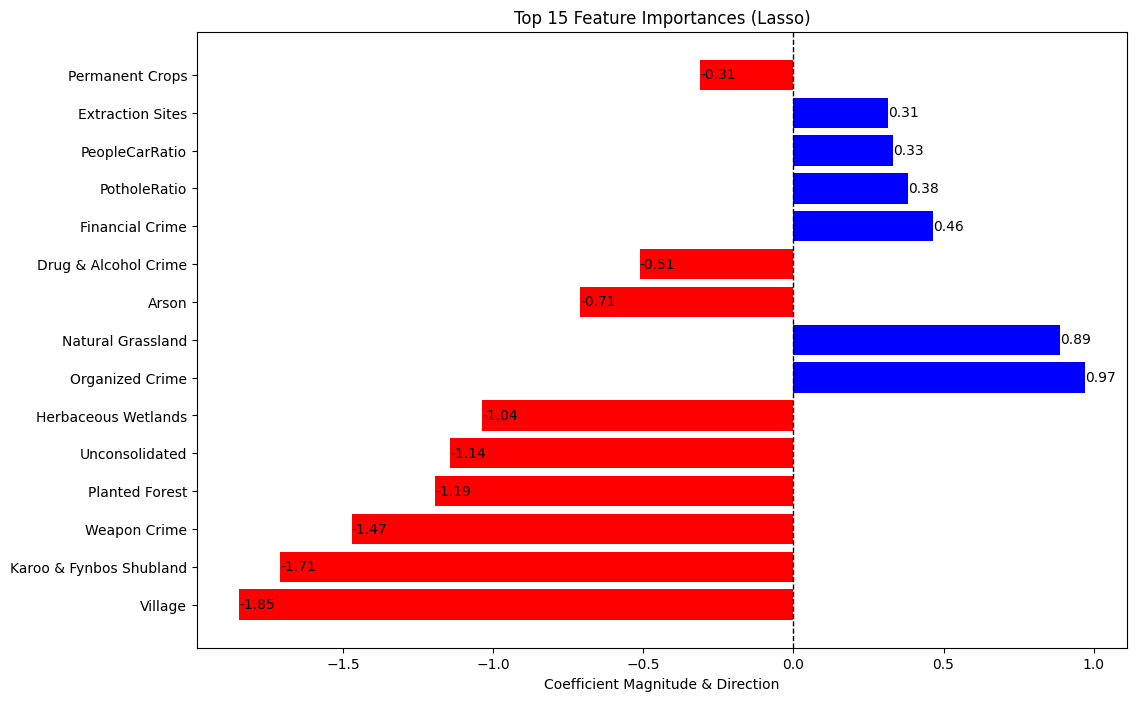

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run Lasso to Confirm Feature Importance
lasso = LassoCV(cv=5, random_state=42, alphas=np.logspace(-3, 3, 20))  # Higher range
lasso.fit(X_scaled, y)

print(f"Best alpha selected by Lasso: {lasso.alpha_}")


# Get the absolute values of Lasso coefficients and sort them
lasso_coefficients = pd.Series(lasso.coef_, index=X_scaled.columns)
selected_features = lasso_coefficients.abs().sort_values(ascending=False).head(num_features).index  # Select top features

print(f"Selected Features ({num_features}): {selected_features.tolist()}")

X_selected = X_scaled[selected_features]

# Step 4: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 5: Print final regression results
print(model.summary())

# Step 6: Plot Feature Importance as Vectors
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(selected_features))
selected_coefficients = lasso_coefficients[selected_features]  # Keep signed values

plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at zero
plt.barh(y_pos, selected_coefficients, color=['red' if x < 0 else 'blue' for x in selected_coefficients])
plt.yticks(y_pos, selected_coefficients.index)
plt.xlabel("Coefficient Magnitude & Direction")
plt.title(f"Top {num_features} Feature Importances (Lasso)")

# Add text labels
for i, v in enumerate(selected_coefficients):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')

plt.show()


# Ridge Regression

### Coefficient Ridge Regression

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run Ridge Regression to Confirm Feature Importance
ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), store_cv_values=True)  # Ridge with cross-validation
ridge.fit(X_scaled, y)

print(f"Best alpha selected by Ridge: {ridge.alpha_}")

# Keep only features with non-zero coefficients (Ridge typically keeps all features but reduces weights)
ridge_coefficients = pd.Series(ridge.coef_, index=X_scaled.columns)
removed_ridge_features = ridge_coefficients[abs(ridge_coefficients) < 0.1].index  # Threshold for removal
print(f"Removed Ridge Features: {removed_ridge_features}")

selected_features = ridge_coefficients[abs(ridge_coefficients) >= 0.1].index
X_selected = X_scaled[selected_features]

# Step 4: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 5: Print final regression results
print(model.summary())


/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Fruitless and Wasteful Expenditure (VIF: inf)
Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by Ridge: 54.555947811685144
Removed Ridge Features: Index(['CarRatio', 'TruckRatio', 'MotorbikeLagDifference',
       'Irregular Expenditure', 'Natural Waterbodies', 'Shrubs',
       'Smallholdings', 'Transport', 'Violent Crime', 'Residential Theft'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


### Top 12 Ridge Regression

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Fruitless and Wasteful Expenditure (VIF: inf)
Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by Ridge: 54.555947811685144
Top 15 Selected Features: ['Weapon Crime', 'Village', 'Karoo & Fynbos Shubland', 'Unconsolidated', 'Planted Forest', 'Herbaceous Wetlands', 'Drug & Alcohol Crime', 'Arson', 'Organized Crime', 'Natural Grassland', 'PotholeRatio', 'PeopleCarRatio', 'Surface Infrastructure', 'Extraction Sites', 'Financial Crime']
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.616
Model

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


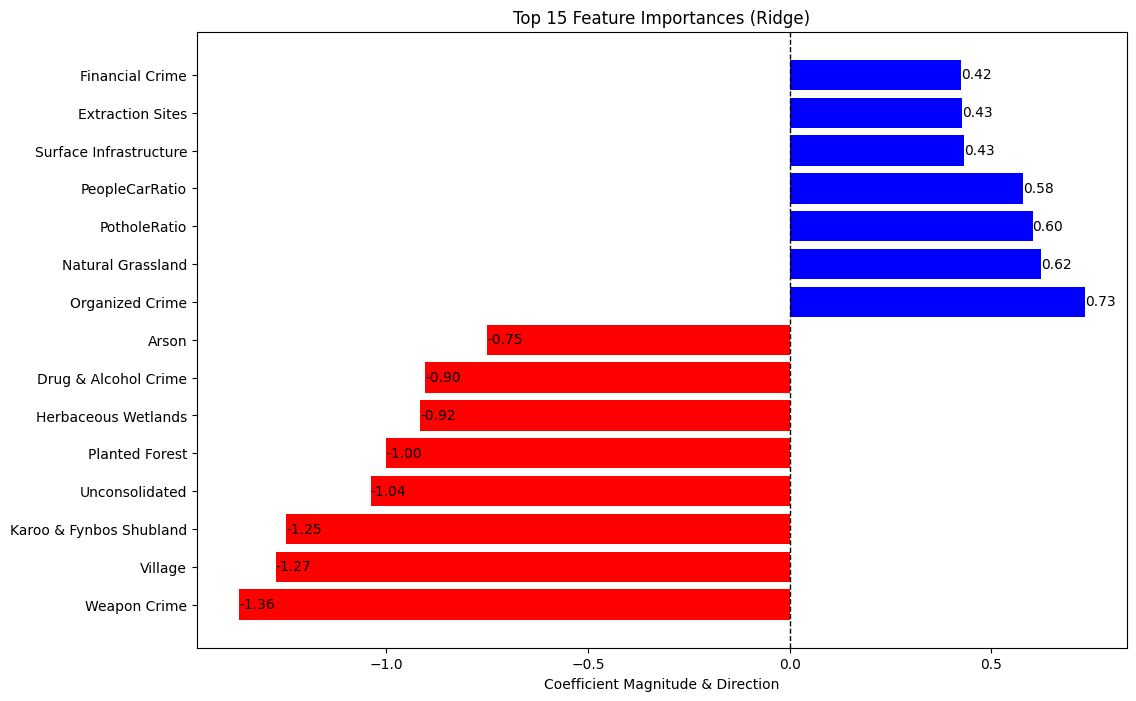

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and Ridge
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run Ridge Regression to Confirm Feature Importance
ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), store_cv_values=True)  # Ridge with cross-validation
ridge.fit(X_scaled, y)

print(f"Best alpha selected by Ridge: {ridge.alpha_}")


ridge_coefficients = pd.Series(ridge.coef_, index=X_scaled.columns)
top_12_features = ridge_coefficients.abs().sort_values(ascending=False).head(num_features).index  # Keep only top 12

print(f"Top {num_features} Selected Features: {top_12_features.tolist()}")

X_selected = X_scaled[top_12_features]

# Step 5: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 6: Print final regression results
print(model.summary())

# Step 7: Plot Feature Importance as Vectors
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(top_12_features))
top_12_signed = ridge_coefficients[top_12_features]  # Keep signs for left/right plotting

plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Vertical line at zero
plt.barh(y_pos, top_12_signed, color=['red' if x < 0 else 'blue' for x in top_12_signed])
plt.yticks(y_pos, top_12_signed.index)
plt.xlabel("Coefficient Magnitude & Direction")
plt.title(f"Top {num_features} Feature Importances (Ridge)")

# Add text labels
for i, v in enumerate(top_12_signed):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')

plt.show()


## Elastanet

In [23]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset (Assume ML is your DataFrame)
# ML = pd.read_csv("your_dataset.csv")

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and ElasticNet
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run ElasticNet Regression with Cross-Validation
elasticnet = ElasticNetCV(cv=5, random_state=42, l1_ratio=[0.1, 0.5, 0.9], 
                          alphas=np.logspace(-2, 3, 30))  # Expanded alpha range
elasticnet.fit(X_scaled, y)

print(f"Best alpha selected by ElasticNet: {elasticnet.alpha_}")
print(f"Best L1 ratio selected by ElasticNet: {elasticnet.l1_ratio_}")

# Keep only features with non-zero coefficients
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X_scaled.columns)
selected_features = elasticnet_coefficients[elasticnet_coefficients != 0]  # Keep nonzero features

print(f"Selected Features: {selected_features.index.tolist()}")

# Step 4: Filter the dataset based on selected features
X_selected = X_scaled[selected_features.index]

# Step 5: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 6: Print final regression results
print(model.summary())




/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Fruitless and Wasteful Expenditure (VIF: inf)
Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)
Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by ElasticNet: 0.16102620275609392
Best L1 ratio selected by ElasticNet: 0.5
Selected Features: ['PotholeRatio', 'TrashRatio', 'MotorbikeRatio', 'PotholeLagDifference', 'TrashLagDifference', 'CarLagDifference', 'TrucklagDifference', 'RoadLagDifffference', 'PeopleCarRatio', 'Unauthorised Expenditure', 'Arson', 'Artificial Waterbodies', 'Consolidated', 'Extraction Sites', 'Fallow Lands & Old Fields', 'Herbaceous Wetlands', 'Industrial', 'Karoo & Fynbos Shubland', 'Natural Grassland', 'Natural Wooded L

### Top 15

/opt/miniconda3/envs/streerview/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Fruitless and Wasteful Expenditure (VIF: inf)
Dropping General Crime (VIF: 40772.561225021105)
Dropping Police Detected Crime (VIF: 321.46967484064567)
Dropping total waste (VIF: 77.43954978900554)
Dropping Commercial (VIF: 26.36276546379602)
Dropping All theft not mentioned elsewhere (VIF: 19.600097992424853)


Dropping RoadRatio (VIF: 13.677194938879742)
Dropping Malicious damage to property (VIF: 12.073187220323094)
Dropping PeopleRatio (VIF: 10.41308891218642)
Best alpha selected by ElasticNet: 0.1623776739188721
Best L1 ratio selected by ElasticNet: 0.5
Top 15 Selected Features: ['Village', 'Karoo & Fynbos Shubland', 'Weapon Crime', 'Unconsolidated', 'Planted Forest', 'Herbaceous Wetlands', 'Organized Crime', 'Arson', 'Natural Grassland', 'Drug & Alcohol Crime', 'PotholeRatio', 'Financial Crime', 'PeopleCarRatio', 'Extraction Sites', 'Permanent Crops']
                            OLS Regression Results                            
Dep. Variable:                   EFF%   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     21.25
Date:                Fri, 21 Feb 2025   Prob (F-statistic):           2.57e-33
Time:                        11:02:30   Log-Likel

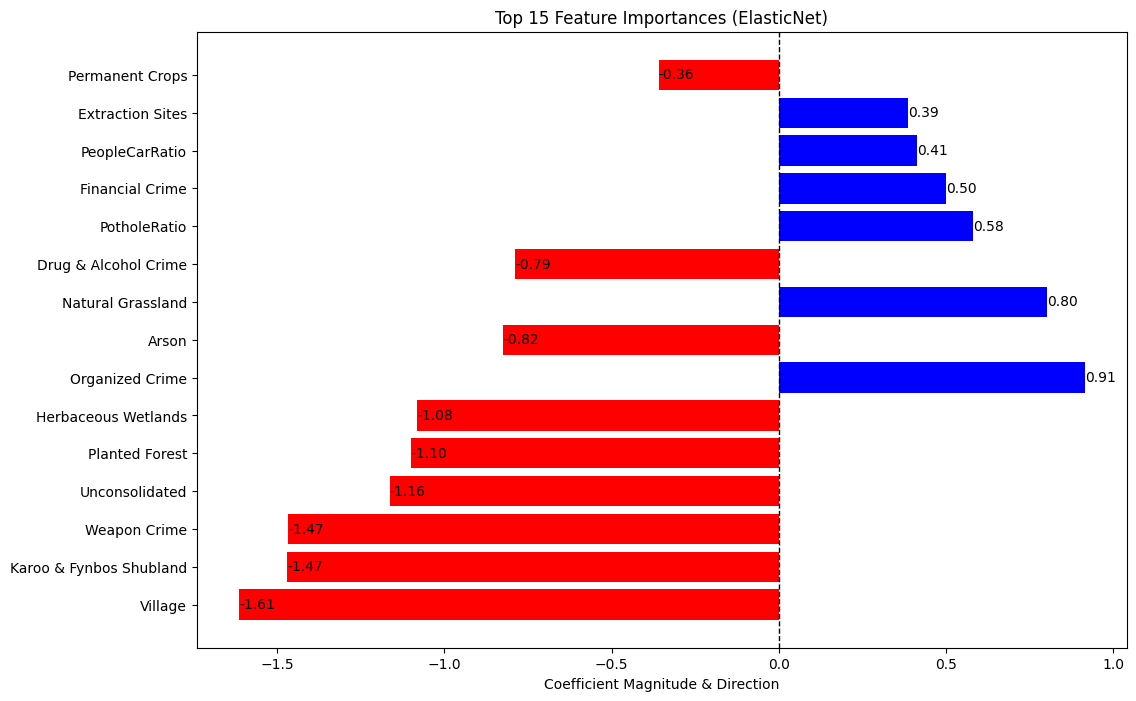

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset (Assume ML is your DataFrame)
# ML = pd.read_csv("your_dataset.csv")

# Define target variable (y) and features (X)
y = ML[target]
X = ML.drop(columns=[target])

# Convert all features to float (avoid dtype issues)
X = X.astype(float)

# Step 1: Standardize Data (Z-score Normalization) BEFORE VIF and ElasticNet
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Compute VIF and Remove Highly Correlated Features More Intelligently
def smart_vif_feature_selection(X, y, threshold=10):
    """
    Removes high VIF features while keeping the one most correlated with the target.
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        high_vif_features = vif_data[vif_data["VIF"] > threshold]
        if high_vif_features.empty:
            break  # Stop if no more high VIF features

        # Drop the feature with the highest VIF
        drop_feature = high_vif_features.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping {drop_feature} (VIF: {high_vif_features['VIF'].max()})")
        X = X.drop(columns=[drop_feature])

    return X

X_scaled = smart_vif_feature_selection(X_scaled, y)

# Step 3: Run ElasticNet Regression with Cross-Validation
elasticnet = ElasticNetCV(cv=5, random_state=42, l1_ratio=[0.1, 0.5, 0.9], alphas=np.logspace(-3, 3, 20))
elasticnet.fit(X_scaled, y)

print(f"Best alpha selected by ElasticNet: {elasticnet.alpha_}")
print(f"Best L1 ratio selected by ElasticNet: {elasticnet.l1_ratio_}")

# Keep only features with non-zero coefficients
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X_scaled.columns)
top_features = elasticnet_coefficients.abs().sort_values(ascending=False).head(num_features)  # Select top 15
top_features_signed = elasticnet_coefficients[top_features.index]  # Keep signs

print(f"Top {num_features} Selected Features: {top_features.index.tolist()}")

# Step 4: Filter the dataset based on top selected features
X_selected = X_scaled[top_features.index]

# Step 5: Add a constant and fit final OLS model
X_selected = sm.add_constant(X_selected)
model = sm.OLS(y, X_selected).fit()

# Step 6: Print final regression results
print(model.summary())

# Step 7: Plot Feature Importance as Vectors
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(top_features_signed))

plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add vertical line at zero
plt.barh(y_pos, top_features_signed, color=['red' if x < 0 else 'blue' for x in top_features_signed])
plt.yticks(y_pos, top_features_signed.index)
plt.xlabel("Coefficient Magnitude & Direction")
plt.title(f"Top {num_features} Feature Importances (ElasticNet)")

for i, v in enumerate(top_features_signed):
    plt.text(v, i, f'{v:.2f}', color='black', va='center')

plt.show()
